# Introduction
Fingerprint verification is a widely used biometric authentication technique that relies on the unique pattern of ridges and valleys on a person's fingers. It is an effective and secure method for identifying individuals and is used in a variety of applications, including access control systems, mobile devices, and financial transactions.

With the recent advancements in deep learning, fingerprint verification can be performed with even higher accuracy and reliability. Deep learning models can automatically learn the intricate patterns in fingerprint images, making them an ideal choice for fingerprint recognition tasks.

However, building a deep learning model for fingerprint verification requires careful consideration of various parameters and constraints. These parameters include the choice of network architecture, optimization algorithm, regularization techniques, and hyperparameter tuning. Additionally, constraints such as data availability, computational resources, and privacy concerns must be taken into account during the model development process.

In this context, the development of efficient and accurate deep learning models for fingerprint verification is a challenging yet promising area to do, with significant potential to improve security and accessibility in various domains.

In this project, we will develop a deep learning model for fingerprint verification. To make a challenge for this work, we will make a constraints in terms of model size and performance. We want to make a pretty small model (< 400k parameters) with minimum accuracy of 90%.

---
# Data
For this specific purpose, we want to use a public fingerprint dataset, Sokoto Conventry Fingerprint (SOCOFing) dataset [[1]](https://arxiv.org/abs/1807.10609). SOCOFing is a biometric fingerprint database that has been created specifically for academic research purposes. It includes a total of 6,000 fingerprint images, which were obtained from 600 African individuals. The dataset is unique in that it includes labels for gender, hand and finger names, as well as synthetically altered versions of the fingerprints that have been modified in different ways. These alterations include obliteration, central rotation, and z-cut. The dataset is available for noncommercial research purposes and can be accessed for free through Kaggle at: https://www.kaggle.com/ruizgara/socofing.

---
# Preprocessing

First, we need to preprocess the data. This process includes label extraction and load it into numpy, we will do that for the data as well.

In [1]:
import numpy as np 
import pandas as pd 

import os, glob
import cv2
import matplotlib.pyplot as plt

The data is formatted as `subject__gender__leftOrRight__fingername__'finger'.BMP` for the Real folder, and `subjectId__gender__leftOrRight__fingername__'finger'__alterMethod.BMP` for Altered folder.

Therefore, we need to extract the label based on that rule. We want to do some encoding regarding to that. The encoding rules are listed as follows:
- For `gender`, we will map `M` (male) into 0, and `F` (female) into 1.
- For `leftOrRight`, we will map `Left` into 0, and `Right` into 1.
- For `fingername`, we will map `thumb` into 0, `index` into 1, `middle` into 2, `ring` into 3, and `little` into 4.

We can do that with this following function:

In [3]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

Our function is ready to run. Now, we will iterate through the directories to extract the data and the label itself.

Note that we want to resize the model into `96 x 96` and save it into numpy array, both for the data and the label. We will save the numpy array if we want to work on another notebook.

And also, we will do this on all available directories, includes `Altered-Easy`, `Altered-Medium`, `Altered-Hard`, and `Real`.

6000


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


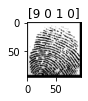

In [4]:
PATH = "../input/socofing/SOCOFing/Real/"
img_list = sorted(glob.glob(PATH+"*.BMP"))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label(img_path)
    
np.savez('/kaggle/working/x_real_96.npz', data=imgs)
np.save('/kaggle/working/y_real_96.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

17931


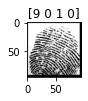

In [5]:
PATH = "../input/socofing/SOCOFing/Altered/Altered-Easy/"
img_list = sorted(glob.glob(PATH+"*.BMP"))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('/kaggle/working/x_easy_96.npz', data=imgs)
np.save('/kaggle/working/y_easy_96.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

17067


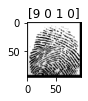

In [6]:
PATH = "../input/socofing/SOCOFing/Altered/Altered-Medium/"
img_list = sorted(glob.glob(PATH+"*.BMP"))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('/kaggle/working/x_medium_96.npz', data=imgs)
np.save('/kaggle/working/y_medium_96.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

14272


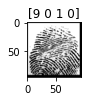

In [7]:
PATH = "../input/socofing/SOCOFing/Altered/Altered-Hard/"
img_list = sorted(glob.glob(PATH+"*.BMP"))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('/kaggle/working/x_hard_96.npz', data=imgs)
np.save('/kaggle/working/y_hard_96.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

We have done the preprocessing step! Next, we want to save the numpy array and load it to another notebook for training and inferencing w.r.t. the data.

---
# References
[1] Shehu, Y.I., Ruiz-Garcia, A., Palade, V. and James, A., 2018. Sokoto coventry fingerprint dataset. arXiv preprint arXiv:1807.10609.